In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv('https://www.kaggle.com/mterzolo/lego-sets/downloads/lego-sets.zip/1',sep=','')

In [19]:
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [23]:
df.isnull().sum()

ages                    0
list_price              0
num_reviews          1620
piece_count             0
play_star_rating     1775
prod_desc             377
prod_id                 0
prod_long_desc          0
review_difficulty    2055
set_name                0
star_rating          1620
theme_name              3
val_star_rating      1795
country                 0
dtype: int64

In [37]:
df=df.drop("theme_name",axis=1)

In [38]:
df.head()

,ages,list_price,piece_count,prod_id,prod_long_desc,set_name,country
0,6-12,29.99,277.0,75823.0,Use the staircase catapult to launch Red into ...,Bird Island Egg Heist,US
1,6-12,19.99,168.0,75822.0,Pilot Pig has taken off from Bird Island with ...,Piggy Plane Attack,US
2,6-12,12.99,74.0,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Piggy Car Escape,US
3,12+,99.99,1032.0,21030.0,Discover the architectural secrets of the icon...,United States Capitol Building,US
4,12+,79.99,744.0,21035.0,Discover the architectural secrets of Frank Ll...,Solomon R. Guggenheim Museum®,US


In [43]:
X = df['piece_count'].values
y=df['list_price'].values

In [49]:
print(X.shape)
X=X.reshape(-1, 1)
len(y)

(12261,)


12261

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0)
print('Training data points: %d' % X_train.shape[0])
print('Testing data points: %d' % X_test.shape[0])

Training data points: 11034
Testing data points: 1227


In [52]:
# Training
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# Testing
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 2079.07, test: 1911.32
R^2 train: 0.75, test: 0.77


intercept_:17.613
coef_:0.096
Mean squared error: 1911.320
Variance score: 0.772
score: 0.772


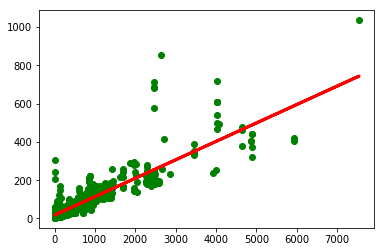

In [62]:
print('intercept_:%.3f' % reg.intercept_)
print('coef_:%.3f' % reg.coef_)
print('Mean squared error: %.3f' % mean_squared_error(y_test,reg.predict(X_test)))
print('Variance score: %.3f' % r2_score(y_test,reg.predict(X_test)))
print('score: %.3f' % reg.score(X_test,y_test))
plt.scatter(X_test , y_test ,color ='green')
plt.plot(X_test ,reg.predict(X_test) ,color='red',linewidth =3)
plt.show()
